<a href="https://colab.research.google.com/github/Bossism/DailyStudy/blob/master/Two_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

加载IMDB数据集

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000
)

讲某条评论迅速解码为英文单词，word_index是一个将单词映射到整数索引的字典

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)
decoded_review

不能直接将整数序列直接传入神经网络，需要先将列表转化为张量，将整数序列编码为二进制矩阵

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# x_train[0]
# y_train[0]

定义模型，中间层用relu作为激活函数，将所有负值归零，最后一层使用sigmoid激活将任意值“压缩”到[0,1]区间内，其输出值可以看作概率。

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

编译模型，使用rmsprop优化器和binary_crossentropy损失函数，在训练过程中监控精度

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

在训练过程中监控模型在前所未见的数据上的精度，将原始训练数据留出10000个样本作为验证集

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,
                    validation_data=(x_val,y_val))

绘制训练损失和验证损失

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


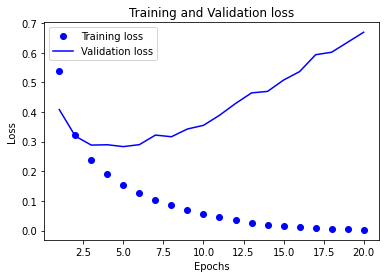

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs, val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

绘制训练精度和验证精度

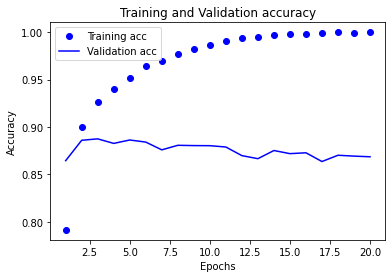

In [20]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

第3轮训练后，模型出现了过拟合现象，现在重新训练一个网络，训练4轮，然后在测试数据上评估模型

In [22]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.5672 - accuracy: 0.7367
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2840 - accuracy: 0.9033
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2033 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2974 - accuracy: 0.8825
[0.29736101627349854, 0.8824800252914429]


使用训练好的网络在新数据中生成预测分类

In [23]:
model.predict(x_test)

array([[0.14500645],
       [0.9999069 ],
       [0.824371  ],
       ...,
       [0.08806482],
       [0.0644232 ],
       [0.5674187 ]], dtype=float32)